# Scan South America Aerosols during one year and look to different kinds of aerosols

- Author :Sylvie Dagoret-Campagne
- affiliation : LAL,IN2P3,CNRS
- organization : LSST 

- creation : Tuesday 26th April 2016

In [64]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import h5py
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [65]:
year_number=2015   # choose the month number
month_start=0      # choose first month
month_stop=11      # choose last month
month_numbers=np.arange(month_start,month_stop+1)
month_stringnumber=['01','02','03','04','05','06','07','08','09','10','11','12']
number_of_monthes=month_numbers.shape[0]

In [66]:
path_root='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00'
fullpath_root=os.path.join(os.path.join(path_root,str(year_number)),'hdf5')

In [67]:
filename_base='CAL_LID_L3_APro_AllSky-Standard-V3-00' # 

### Specify Input Filenames
- day-  : CAL_LID_L3_APro_AllSky-Standard-V3-00.2006-06D.h5
- night : CAL_LID_L3_APro_AllSky-Standard-V3-00.2006-06N.h5

In [68]:
dayfile_extension= [ str(year_number)+'-'+month_stringnumber[ix]+'D'+'.h5' for ix in month_numbers]

In [69]:
nightfile_extension= [ str(year_number)+'-'+month_stringnumber[ix]+'N'+'.h5' for ix in month_numbers]

In [70]:
dayfiles_fullname=[os.path.join(fullpath_root,filename_base+'.'+dayfile_extension[ix]) for ix in month_numbers ]

In [71]:
nightfiles_fullname=[os.path.join(fullpath_root, filename_base+'.'+nightfile_extension[ix]) for ix in month_numbers]

In [72]:
# /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00/2015/hdf5
#dayfiles_fullname

### defines pdf output filename containing plots

In [73]:
filename_pdf='all_aerosol_worldmap_year_'+str(year_number)+'.pdf'

In [74]:
pp = PdfPages(filename_pdf)

### LSST site

In [75]:
#LSST site
Longitude_lsst = -70.7366833333333 # deg
Latitude_lsst = -30.240741666666672 #deg
Altitude_lsst = 2749.999999999238 #m


#CTIO Site
Longitude_ctio = -70.815 # deg
Latitude_ctio = -30.165277777777778 #deg
Altitude_ctio = 2214.9999999993697 #m

# Cerro Paranal
Longitude_paranal = -70.40300000000002 #deg
Latitude_paranal  = -24.625199999999996 #deg
Altitude_paranal = 2635.0000000009704 #m


### Defines South America Region

- longitude -100° to -30°
- latitude -55° to 15°

In [76]:
#Borders of the map
LongMin=-100
LongMax=-30
LatMin=-55
LatMax=15
# center of the projection
Long0=-70
Lat0=-30

## work on first file, reading the data and showing the map for a first test


It set also variables usefull for the loop

In [77]:
fileindex=0

In [78]:
h5f = h5py.File(dayfiles_fullname[fileindex], "r")  # file on which one works

In [79]:
longitude=h5f['Longitude_Midpoint']   # shape =(1,72)
all_longitude=longitude[0,:]    # coordinates for X

In [80]:
latitude=h5f['Latitude_Midpoint']     # shape = (1,85)
all_latitude=latitude[0,:]      # coordinate for Y

In [81]:
X,Y=np.meshgrid(all_longitude,all_latitude) # defines the mesh grid for the map

In [82]:
aod_mean=h5f['AOD_Mean']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
aod_arr=np.array(aod_mean)  # convert in a numpy array
aod_mean_clean=np.where(np.logical_and(aod_arr>0,aod_arr<1),aod_arr, 0 )  # clean the aod from creazy data    

In [83]:
#all aerosols
#------------
aod_mean=h5f['AOD_Mean']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
aod_shape=aod_mean.shape    # get the original size of the array
aod_arr=np.array(aod_mean)  # convert in a numpy array
aod_mean_clean=np.where(np.logical_and(aod_arr>0,aod_arr<1),aod_arr, 0 )  # clean the aod from creazy data

# dust aerosols
#--------------
aod_dust=h5f['AOD_Mean_Dust']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
dust_arr=np.array(aod_dust)  # convert in a numpy array
aod_dust_clean=np.where(np.logical_and(dust_arr>0,dust_arr<1),dust_arr, 0 )  # clean the aod from creazy data

# dust polluted aerosols
#-----------------------
aod_polluteddust=h5f['AOD_Mean_Polluted_Dust']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
polluteddust_arr=np.array(aod_polluteddust)  # convert in a numpy array
aod_polluteddust_clean=np.where(np.logical_and(polluteddust_arr>0,polluteddust_arr<1),polluteddust_arr, 0 )  # clean the aod from creazy data
 
# smoke aerosols
#----------------
aod_smoke=h5f['AOD_Mean_Smoke']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
smoke_arr=np.array(aod_smoke)  # convert in a numpy array
aod_smoke_clean=np.where(np.logical_and(smoke_arr>0,smoke_arr<1),smoke_arr, 0 )  # clean the aod from creazy data


In [84]:
h5f.close()

### Condition to extract data for south america from the world map

In [85]:
flags_long=np.logical_and(X>=LongMin, X<=LongMax)   # flags in X where are the selected longitudes
flags_lat=np.logical_and(Y>=LatMin, Y<=LatMax)      # flags in Y where are the selected longitudes
flags_longlat=np.logical_and(flags_long,flags_lat)  # flags where the region is selected in the long-lat matrix
selected_long_indexes=np.where(np.logical_and(all_longitude>=LongMin, all_longitude<=LongMax))
selected_lat_indexes=np.where(np.logical_and(all_latitude>=LatMin, all_latitude<=LatMax))
selected_long=all_longitude[selected_long_indexes] # all selected longitudes
selected_lat=all_latitude[selected_lat_indexes]    # all selected latitudes
min_long_index=np.min(selected_long_indexes)
max_long_index=np.max(selected_long_indexes)
min_lat_index=np.min(selected_lat_indexes)
max_lat_index=np.max(selected_lat_indexes)
Xsel,Ysel=np.meshgrid(selected_long,selected_lat)
extracted_aod=aod_mean_clean[min_lat_index:max_lat_index,min_long_index:max_long_index] # extract the aod data
extracted_aod_dust=aod_dust_clean[min_lat_index:max_lat_index,min_long_index:max_long_index]
extracted_aod_polluteddust=aod_polluteddust_clean[min_lat_index:max_lat_index,min_long_index:max_long_index]
extracted_aod_smoke=aod_smoke_clean[min_lat_index:max_lat_index,min_long_index:max_long_index]

[]

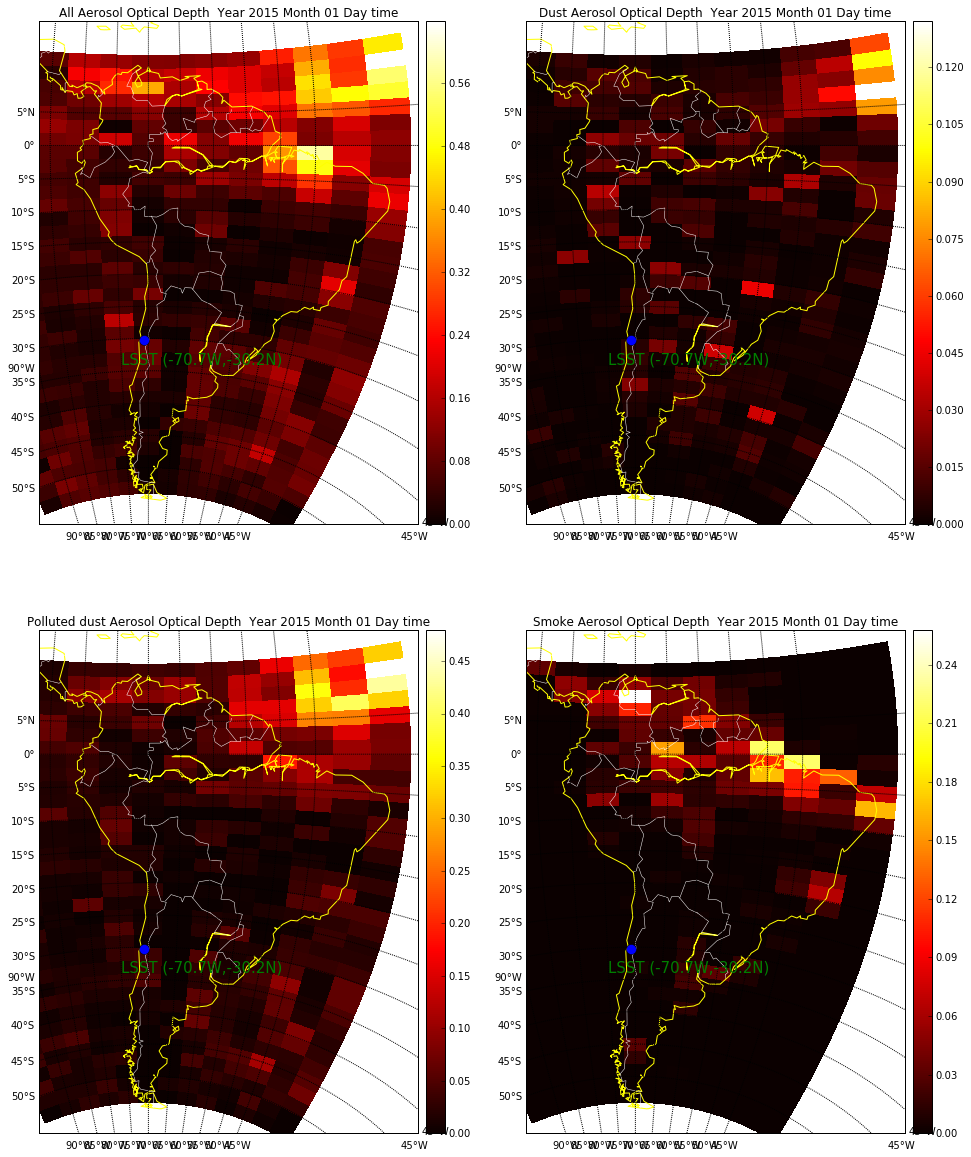

In [86]:
fig=plt.figure(figsize=(16,20))
#fig.subplots_adjust(wspace='None',hspace='None',left='None',right='None',top='None',bottom='None')



# upper left plot
#-----------------
ax1=fig.add_subplot(2,2,1)
# create map
map = Basemap(llcrnrlon=LongMin,llcrnrlat=LatMin,urcrnrlon=LongMax,urcrnrlat=LatMax, projection='tmerc', lat_0 = Lat0, lon_0 = Long0)
img=map.pcolormesh(Xsel,Ysel,extracted_aod,shading='flat',cmap="hot",latlon=True)
map.colorbar(img,"right", size="5%", pad="2%")
# draw usefull lines
map.drawparallels(np.arange(-50,10,5.),labels=[True,False,False,False])
map.drawmeridians(np.arange(-90.,-40.,5.),labels=[True,True,False,True])
map.drawcoastlines(color='yellow')
map.drawcountries(color='white')
# draw LSST info
xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)  # Draw the Marker point for LSST 
map.plot(xpt_lsst,ypt_lsst,'bo',markersize=10)  # plot a red dot there
plt.text(xpt_lsst-400000,ypt_lsst-400000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='green', fontsize=15)
title = "All Aerosol Optical Depth  Year %s Month %s Day time" % (year_number, month_stringnumber[fileindex])
ax1.set_title(title)
ax1.plot()

# upper right plot
#-----------------
ax2=fig.add_subplot(2,2,2)
#create the map
map = Basemap(llcrnrlon=LongMin,llcrnrlat=LatMin,urcrnrlon=LongMax,urcrnrlat=LatMax, projection='tmerc', lat_0 = Lat0, lon_0 = Long0)
img=map.pcolormesh(Xsel,Ysel,extracted_aod_dust,shading='flat',cmap="hot",latlon=True)
map.colorbar(img,"right", size="5%", pad="2%")
#draw usefull lines
map.drawparallels(np.arange(-50,10,5.),labels=[True,False,False,False])
map.drawmeridians(np.arange(-90.,-40.,5.),labels=[True,True,False,True])
map.drawcoastlines(color='yellow')
map.drawcountries(color='white')
#draw LSST info
xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)
map.plot(xpt_lsst,ypt_lsst,'bo',markersize=10)  # plot a red dot there
plt.text(xpt_lsst-400000,ypt_lsst-400000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='green', fontsize=15)
title = "Dust Aerosol Optical Depth  Year %s Month %s Day time" % (year_number, month_stringnumber[fileindex])
ax2.set_title(title)
ax2.plot()

# Lower left plot
#-------------------
ax3=fig.add_subplot(2,2,3)
#create map
map = Basemap(llcrnrlon=LongMin,llcrnrlat=LatMin,urcrnrlon=LongMax,urcrnrlat=LatMax, projection='tmerc', lat_0 = Lat0, lon_0 = Long0)
img=map.pcolormesh(Xsel,Ysel,extracted_aod_polluteddust,shading='flat',cmap="hot",latlon=True)
map.colorbar(img,"right", size="5%", pad="2%")
#draw usefull lines
map.drawparallels(np.arange(-50,10,5.),labels=[True,False,False,False])
map.drawmeridians(np.arange(-90.,-40.,5.),labels=[True,True,False,True])
map.drawcoastlines(color='yellow')
map.drawcountries(color='white')
#draw LSST info
xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)
map.plot(xpt_lsst,ypt_lsst,'bo',markersize=10)  # plot a red dot thE MARKER
plt.text(xpt_lsst-400000,ypt_lsst-400000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='green', fontsize=15)
title = "Polluted dust Aerosol Optical Depth  Year %s Month %s Day time" % (year_number, month_stringnumber[fileindex])
ax3.set_title(title)
ax3.plot()


# Lower right plot
#-------------------

ax4=fig.add_subplot(2,2,4)
#create the map
map = Basemap(llcrnrlon=LongMin,llcrnrlat=LatMin,urcrnrlon=LongMax,urcrnrlat=LatMax, projection='tmerc', lat_0 = Lat0, lon_0 = Long0)
img=map.pcolormesh(Xsel,Ysel,extracted_aod_smoke,shading='flat',cmap="hot",latlon=True)
map.colorbar(img,"right", size="5%", pad="2%")
#draw usefull lines
map.drawparallels(np.arange(-50,10,5.),labels=[True,False,False,False])
map.drawmeridians(np.arange(-90.,-40.,5.),labels=[True,True,False,True])
map.drawcoastlines(color='yellow')
map.drawcountries(color='white')
#draw LSST info
xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)
map.plot(xpt_lsst,ypt_lsst,'bo',markersize=10)  # plot a red dot MARKER
plt.text(xpt_lsst-400000,ypt_lsst-400000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='green', fontsize=15)
title = "Smoke Aerosol Optical Depth  Year %d Month %s Day time" % (year_number, month_stringnumber[fileindex])
ax4.set_title(title)
ax4.plot()


#figfilename="Images/SouthAmericaMAPSAODY%d%sDay.pdf" %(year_number,month_stringnumber[fileindex])
#plt.savefig(figfilename, bbox_inches='tight')
#plt.close(fig)



## Loop to Open files, reading the data and showing the map

In [87]:
for imonth in month_numbers:
    
    
    message= ">>>> Year %d Month %s Day File %s : " %(year_number,month_stringnumber[imonth],dayfiles_fullname[imonth])
    
    
    
    # Start with day time
    #---------------------
    h5fday = h5py.File(dayfiles_fullname[imonth], "r")  # file on which one works
    aod_mean_day=h5fday['AOD_Mean']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    aod_arr_day=np.array(aod_mean_day)  # convert in a numpy array
    aod_mean_clean_day=np.where(np.logical_and(aod_arr_day>0,aod_arr_day<1),aod_arr_day, 0 )  # clean the aod from creazy data 
    
    #all aerosols
    #------------
    aod_mean=h5fday['AOD_Mean']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    aod_arr=np.array(aod_mean)  # convert in a numpy array
    aod_mean_clean_day=np.where(np.logical_and(aod_arr>0,aod_arr<1),aod_arr, 0 )  # clean the aod from creazy data

    # dust aerosols
    #--------------
    aod_dust=h5fday['AOD_Mean_Dust']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    dust_arr=np.array(aod_dust)  # convert in a numpy array
    aod_dust_clean_day=np.where(np.logical_and(dust_arr>0,dust_arr<1),dust_arr, 0 )  # clean the aod from creazy data

    # dust polluted aerosols
    #-----------------------
    aod_polluteddust=h5fday['AOD_Mean_Polluted_Dust']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    polluteddust_arr=np.array(aod_polluteddust)  # convert in a numpy array
    aod_polluteddust_clean_day=np.where(np.logical_and(polluteddust_arr>0,polluteddust_arr<1),polluteddust_arr, 0 )  # clean the aod from creazy data
 
    # smoke aerosols
    #----------------
    aod_smoke=h5fday['AOD_Mean_Smoke']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    smoke_arr=np.array(aod_smoke)  # convert in a numpy array
    aod_smoke_clean_day=np.where(np.logical_and(smoke_arr>0,smoke_arr<1),smoke_arr, 0 )  # clean the aod from creazy data

    #close input file
    h5fday.close()
    
    
    extracted_aod_day=aod_mean_clean_day[min_lat_index:max_lat_index,min_long_index:max_long_index] # extract the aod data
    extracted_aod_dust_day=aod_dust_clean_day[min_lat_index:max_lat_index,min_long_index:max_long_index]
    extracted_aod_polluteddust_day=aod_polluteddust_clean_day[min_lat_index:max_lat_index,min_long_index:max_long_index]
    extracted_aod_smoke_day=aod_smoke_clean_day[min_lat_index:max_lat_index,min_long_index:max_long_index]
    
    
    # Start with night time
    #---------------------
    
    message= ">>>> Year %d Month %s Night File %s : " %(year_number,month_stringnumber[imonth],nightfiles_fullname[imonth])
    
    h5fnight = h5py.File(nightfiles_fullname[imonth], "r")  # file on which one works

    
    #all aerosols
    #------------
    aod_mean=h5fnight['AOD_Mean']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    aod_arr=np.array(aod_mean)  # convert in a numpy array
    aod_mean_clean_night=np.where(np.logical_and(aod_arr>0,aod_arr<1),aod_arr, 0 )  # clean the aod from creazy data

    # dust aerosols
    #--------------
    aod_dust=h5fnight['AOD_Mean_Dust']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    dust_arr=np.array(aod_dust)  # convert in a numpy array
    aod_dust_clean_night=np.where(np.logical_and(dust_arr>0,dust_arr<1),dust_arr, 0 )  # clean the aod from creazy data

    # dust polluted aerosols
    #-----------------------
    aod_polluteddust=h5fnight['AOD_Mean_Polluted_Dust']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    polluteddust_arr=np.array(aod_polluteddust)  # convert in a numpy array
    aod_polluteddust_clean_night=np.where(np.logical_and(polluteddust_arr>0,polluteddust_arr<1),polluteddust_arr, 0 )  # clean the aod from creazy data
 
    # smoke aerosols
    #----------------
    aod_smoke=h5fnight['AOD_Mean_Smoke']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    smoke_arr=np.array(aod_smoke)  # convert in a numpy array
    aod_smoke_clean_night=np.where(np.logical_and(smoke_arr>0,smoke_arr<1),smoke_arr, 0 )  # clean the aod from creazy data 
    
    
    h5fnight.close()
  
    extracted_aod_night=aod_mean_clean_night[min_lat_index:max_lat_index,min_long_index:max_long_index] # extract the aod data
    extracted_aod_dust_night=aod_dust_clean_night[min_lat_index:max_lat_index,min_long_index:max_long_index]
    extracted_aod_polluteddust_night=aod_polluteddust_clean_night[min_lat_index:max_lat_index,min_long_index:max_long_index]
    extracted_aod_smoke_night=aod_smoke_clean_night[min_lat_index:max_lat_index,min_long_index:max_long_index]



    # day map for this month
    #------------------------

    fig=plt.figure(figsize=(16,20))
    #fig.subplots_adjust(wspace='None',hspace='None',left='None',right='None',top='None',bottom='None')


    # upper left plot
    #-----------------
    ax1=fig.add_subplot(2,2,1)
    # create map
    map = Basemap(llcrnrlon=LongMin,llcrnrlat=LatMin,urcrnrlon=LongMax,urcrnrlat=LatMax, projection='tmerc', lat_0 = Lat0, lon_0 = Long0)
    img=map.pcolormesh(Xsel,Ysel,extracted_aod_day,shading='flat',cmap="hot",latlon=True)
    map.colorbar(img,"right", size="5%", pad="2%")
    # draw usefull lines
    map.drawparallels(np.arange(-50,10,5.),labels=[True,False,False,False])
    map.drawmeridians(np.arange(-90.,-40.,5.),labels=[True,True,False,True])
    map.drawcoastlines(color='yellow')
    map.drawcountries(color='white')
    # draw LSST info
    xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)  # Draw the Marker point for LSST 
    map.plot(xpt_lsst,ypt_lsst,'bo',markersize=10)  # plot a red dot there
    plt.text(xpt_lsst-400000,ypt_lsst-400000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='green', fontsize=15)
    title = "All Aerosol Optical Depth  Year %s Month %s Day time" % (year_number, month_stringnumber[imonth])
    ax1.set_title(title)
    ax1.plot()

    # upper right plot
    #-----------------
    ax2=fig.add_subplot(2,2,2)
    #create the map
    map = Basemap(llcrnrlon=LongMin,llcrnrlat=LatMin,urcrnrlon=LongMax,urcrnrlat=LatMax, projection='tmerc', lat_0 = Lat0, lon_0 = Long0)
    img=map.pcolormesh(Xsel,Ysel,extracted_aod_dust_day,shading='flat',cmap="hot",latlon=True)
    map.colorbar(img,"right", size="5%", pad="2%")
    #draw usefull lines
    map.drawparallels(np.arange(-50,10,5.),labels=[True,False,False,False])
    map.drawmeridians(np.arange(-90.,-40.,5.),labels=[True,True,False,True])
    map.drawcoastlines(color='yellow')
    map.drawcountries(color='white')
    #draw LSST info
    xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)
    map.plot(xpt_lsst,ypt_lsst,'bo',markersize=10)  # plot a red dot there
    plt.text(xpt_lsst-400000,ypt_lsst-400000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='green', fontsize=15)
    title = "Dust Aerosol Optical Depth  Year %s Month %s Day time" % (year_number, month_stringnumber[imonth])
    ax2.set_title(title)
    ax2.plot()

    # Lower left plot
    #-------------------
    ax3=fig.add_subplot(2,2,3)
    #create map
    map = Basemap(llcrnrlon=LongMin,llcrnrlat=LatMin,urcrnrlon=LongMax,urcrnrlat=LatMax, projection='tmerc', lat_0 = Lat0, lon_0 = Long0)
    img=map.pcolormesh(Xsel,Ysel,extracted_aod_polluteddust_day,shading='flat',cmap="hot",latlon=True)
    map.colorbar(img,"right", size="5%", pad="2%")
    #draw usefull lines
    map.drawparallels(np.arange(-50,10,5.),labels=[True,False,False,False])
    map.drawmeridians(np.arange(-90.,-40.,5.),labels=[True,True,False,True])
    map.drawcoastlines(color='yellow')
    map.drawcountries(color='white')
    #draw LSST info
    xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)
    map.plot(xpt_lsst,ypt_lsst,'bo',markersize=10)  # plot a red dot thE MARKER
    plt.text(xpt_lsst-400000,ypt_lsst-400000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='green', fontsize=15)
    title = "Polluted dust Aerosol Optical Depth  Year %s Month %s Day time" % (year_number, month_stringnumber[imonth])
    ax3.set_title(title)
    ax3.plot()


    # Lower right plot
    #-------------------

    ax4=fig.add_subplot(2,2,4)
    #create the map
    map = Basemap(llcrnrlon=LongMin,llcrnrlat=LatMin,urcrnrlon=LongMax,urcrnrlat=LatMax, projection='tmerc', lat_0 = Lat0, lon_0 = Long0)
    img=map.pcolormesh(Xsel,Ysel,extracted_aod_smoke_day,shading='flat',cmap="hot",latlon=True)
    map.colorbar(img,"right", size="5%", pad="2%")
    #draw usefull lines
    map.drawparallels(np.arange(-50,10,5.),labels=[True,False,False,False])
    map.drawmeridians(np.arange(-90.,-40.,5.),labels=[True,True,False,True])
    map.drawcoastlines(color='yellow')
    map.drawcountries(color='white')
    #draw LSST info
    xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)
    map.plot(xpt_lsst,ypt_lsst,'bo',markersize=10)  # plot a red dot MARKER
    plt.text(xpt_lsst-400000,ypt_lsst-400000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='green', fontsize=15)
    title = "Smoke Aerosol Optical Depth  Year %d Month %s Day time" % (year_number, month_stringnumber[imonth])
    ax4.set_title(title)
    ax4.plot()

    figfilename="Images/SouthAmericaMAPSAODY%d%sDay.pdf" %(year_number,month_stringnumber[imonth])
    plt.savefig(figfilename, bbox_inches='tight')
    plt.close(fig)
    
    
    
    
    #-----------------------------------------------------------------------------------------
    
    # night map for this month
    #------------------------

    fig=plt.figure(figsize=(16,20))
    #fig.subplots_adjust(wspace='None',hspace='None',left='None',right='None',top='None',bottom='None')

    # upper left plot
    #-----------------
    ax1=fig.add_subplot(2,2,1)
    # create map
    map = Basemap(llcrnrlon=LongMin,llcrnrlat=LatMin,urcrnrlon=LongMax,urcrnrlat=LatMax, projection='tmerc', lat_0 = Lat0, lon_0 = Long0)
    img=map.pcolormesh(Xsel,Ysel,extracted_aod_night,shading='flat',cmap="hot",latlon=True)
    map.colorbar(img,"right", size="5%", pad="2%")
    # draw usefull lines
    map.drawparallels(np.arange(-50,10,5.),labels=[True,False,False,False])
    map.drawmeridians(np.arange(-90.,-40.,5.),labels=[True,True,False,True])
    map.drawcoastlines(color='yellow')
    map.drawcountries(color='white')
    # draw LSST info
    xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)  # Draw the Marker point for LSST 
    map.plot(xpt_lsst,ypt_lsst,'bo',markersize=10)  # plot a red dot there
    plt.text(xpt_lsst-400000,ypt_lsst-400000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='green', fontsize=15)
    title = "All Aerosol Optical Depth  Year %s Month %s Night time" % (year_number, month_stringnumber[imonth])
    ax1.set_title(title)
    ax1.plot()

    # upper right plot
    #-----------------
    ax2=fig.add_subplot(2,2,2)
    #create the map
    map = Basemap(llcrnrlon=LongMin,llcrnrlat=LatMin,urcrnrlon=LongMax,urcrnrlat=LatMax, projection='tmerc', lat_0 = Lat0, lon_0 = Long0)
    img=map.pcolormesh(Xsel,Ysel,extracted_aod_dust_night,shading='flat',cmap="hot",latlon=True)
    map.colorbar(img,"right", size="5%", pad="2%")
    #draw usefull lines
    map.drawparallels(np.arange(-50,10,5.),labels=[True,False,False,False])
    map.drawmeridians(np.arange(-90.,-40.,5.),labels=[True,True,False,True])
    map.drawcoastlines(color='yellow')
    map.drawcountries(color='white')
    #draw LSST info
    xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)
    map.plot(xpt_lsst,ypt_lsst,'bo',markersize=10)  # plot a red dot there
    plt.text(xpt_lsst-400000,ypt_lsst-400000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='green', fontsize=15)
    title = "Dust Aerosol Optical Depth  Year %s Month %s Night time" % (year_number, month_stringnumber[imonth])
    ax2.set_title(title)
    ax2.plot()

    # Lower left plot
    #-------------------
    ax3=fig.add_subplot(2,2,3)
    #create map
    map = Basemap(llcrnrlon=LongMin,llcrnrlat=LatMin,urcrnrlon=LongMax,urcrnrlat=LatMax, projection='tmerc', lat_0 = Lat0, lon_0 = Long0)
    img=map.pcolormesh(Xsel,Ysel,extracted_aod_polluteddust_night,shading='flat',cmap="hot",latlon=True)
    map.colorbar(img,"right", size="5%", pad="2%")
    #draw usefull lines
    map.drawparallels(np.arange(-50,10,5.),labels=[True,False,False,False])
    map.drawmeridians(np.arange(-90.,-40.,5.),labels=[True,True,False,True])
    map.drawcoastlines(color='yellow')
    map.drawcountries(color='white')
    #draw LSST info
    xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)
    map.plot(xpt_lsst,ypt_lsst,'bo',markersize=10)  # plot a red dot thE MARKER
    plt.text(xpt_lsst-400000,ypt_lsst-400000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='green', fontsize=15)
    title = "Polluted dust Aerosol Optical Depth  Year %s Month %s Night time" % (year_number, month_stringnumber[imonth])
    ax3.set_title(title)
    ax3.plot()


    # Lower right plot
    #-------------------

    ax4=fig.add_subplot(2,2,4)
    #create the map
    map = Basemap(llcrnrlon=LongMin,llcrnrlat=LatMin,urcrnrlon=LongMax,urcrnrlat=LatMax, projection='tmerc', lat_0 = Lat0, lon_0 = Long0)
    img=map.pcolormesh(Xsel,Ysel,extracted_aod_smoke_night,shading='flat',cmap="hot",latlon=True)
    map.colorbar(img,"right", size="5%", pad="2%")
    #draw usefull lines
    map.drawparallels(np.arange(-50,10,5.),labels=[True,False,False,False])
    map.drawmeridians(np.arange(-90.,-40.,5.),labels=[True,True,False,True])
    map.drawcoastlines(color='yellow')
    map.drawcountries(color='white')
    #draw LSST info
    xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)
    map.plot(xpt_lsst,ypt_lsst,'bo',markersize=10)  # plot a red dot MARKER
    plt.text(xpt_lsst-400000,ypt_lsst-400000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='green', fontsize=15)
    title = "Smoke Aerosol Optical Depth  Year %d Month %s Night time" % (year_number, month_stringnumber[imonth])
    ax4.set_title(title)
    ax4.plot()


    figfilename="Images/SouthAmericaMAPSAODY%d%sNight.pdf" %(year_number,month_stringnumber[imonth])
    plt.savefig(figfilename, bbox_inches='tight')
    plt.close(fig)
    
        

In [88]:
pp.close()